In [1]:
import random
import time

import scipy.linalg
import IPython
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

def normalize(W):
    m,n = W.shape
    if m >= n:
        return scipy.linalg.orth(W)
    else:
        return scipy.linalg.orth(W.T).T

def subspace_dist(M,N,r):
    U,D,V = np.linalg.svd(N)
    Nr = U[:,0:r]#@np.diag(D[0:r])@V[0:r,:]
    NrP = Nr@np.linalg.pinv(Nr)
    MP = M@np.linalg.pinv(M)
    return np.linalg.norm(MP-NrP)/np.linalg.norm(NrP)
    
d = 10
r = 5
s = 8
n = 500
batch = 100

learning_rate = 1e-3
learning_rate_m = 1e-2

W = Variable(torch.randn(r,d), requires_grad=True)
V = Variable(torch.randn(d,r), requires_grad=True)
Xm = Variable(torch.randn(d-s,n), requires_grad=True)

loss = torch.nn.MSELoss(size_average=False)#

Vtrue = torch.Tensor(normalize(np.random.randn(d, r)))
Xtrue = Vtrue@torch.randn(r,n)#((Vtrue.t()@torch.rand(d, n)).clamp(min=0))
Xtrue = Variable(torch.Tensor(Xtrue))
#@(torch.eye(n) - 1./n*torch.ones(n))
omegas = [torch.LongTensor(sorted(np.random.choice(d, s, replace=False).tolist())) for i in range(n)]
momegas = [torch.LongTensor(sorted(list(set(range(d)) - set(o_d)))) for o_d in omegas]

def omegaloss(V, W, omegas, Xtrue, iset):
    if type(iset) in [np.int64,int] :
        i = iset
        return loss(V.mv((W[:,omegas[i]]@Xtrue[:,i][omegas[i]]+W[:,momegas[i]]@Xm[:,i]).clamp(min=0))[omegas[i]], 
                    Xtrue[:,i][omegas[i]])
    l = 0
    for j in iset:
        l += loss(V.mv((W[:,omegas[j]]@Xtrue[:,j][omegas[j]]+W[:,momegas[j]]@Xm[:,j]).clamp(min=0))[omegas[j]], 
                    Xtrue[:,j][omegas[j]])
    return l


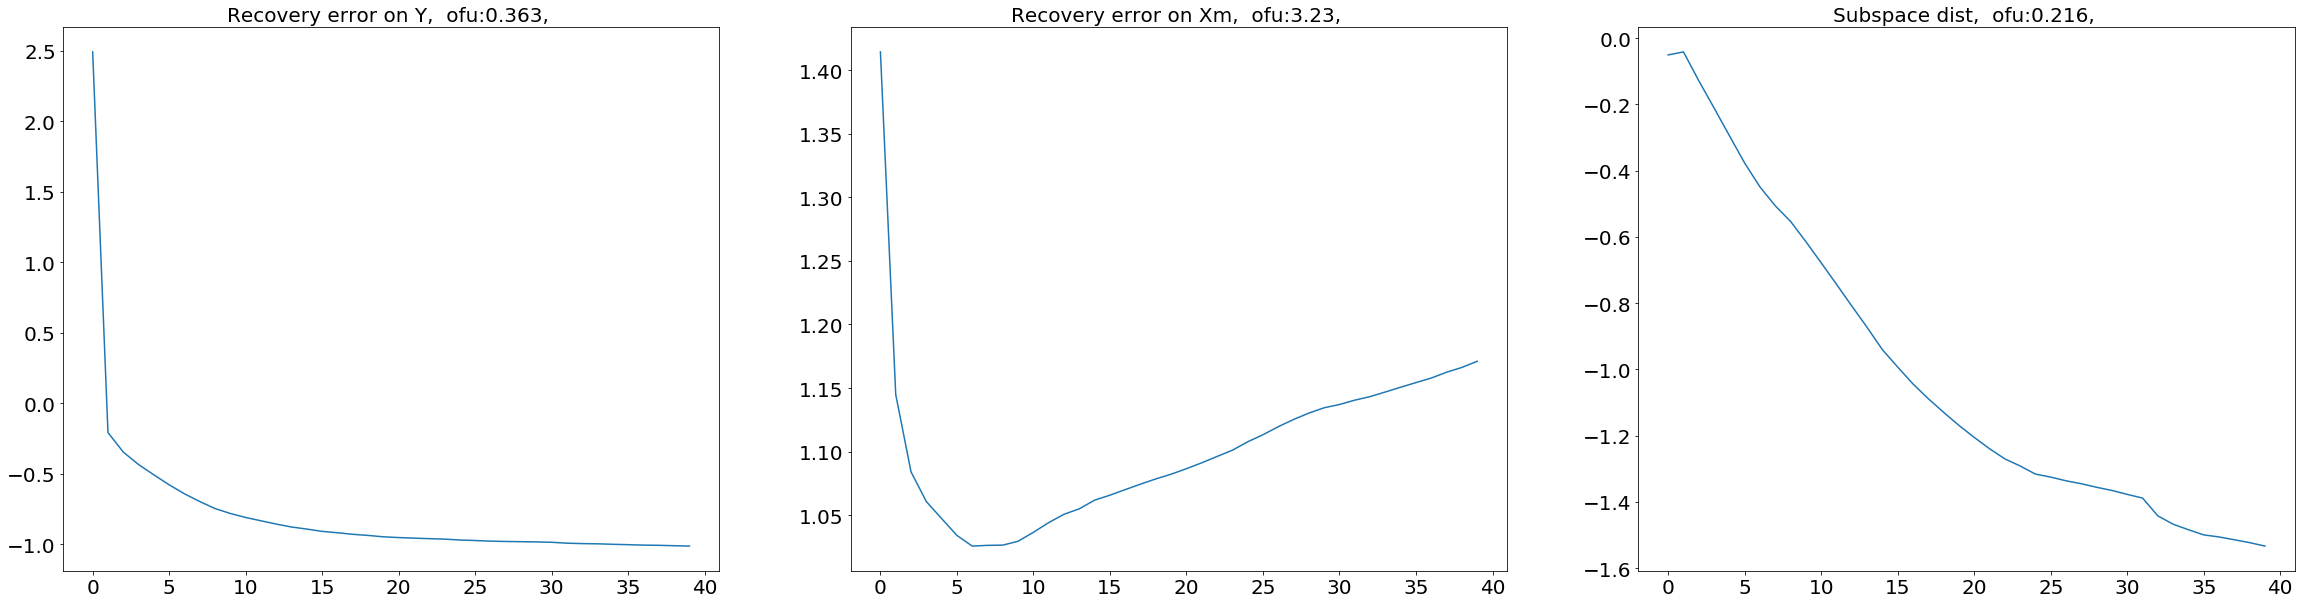


 1.1751
 1.2186
[torch.FloatTensor of size 2]
 4.886562261624737 19600

 1.1755
 1.2185
[torch.FloatTensor of size 2]
 2.517764376248047 19600

 1.1758
 1.2184
[torch.FloatTensor of size 2]
 2.1644593889200747 19600

 1.1762
 1.2184
[torch.FloatTensor of size 2]
 2.2199429129949144 19600

 1.1765
 1.2184
[torch.FloatTensor of size 2]
 2.1474503278136834 19600

 1.1769
 1.2184
[torch.FloatTensor of size 2]
 2.2069879644296675 19600

 1.1772
 1.2184
[torch.FloatTensor of size 2]
 2.1338155466109137 19600

 1.1775
 1.2184
[torch.FloatTensor of size 2]
 2.1956304949963856 19600

 1.1778
 1.2184
[torch.FloatTensor of size 2]
 2.2655090051293656 19600

 1.1780
 1.2184
[torch.FloatTensor of size 2]
 2.1994223899363075 19600

 1.1783
 1.2185
[torch.FloatTensor of size 2]
 2.22811061287886 19600

 1.1786
 1.2185
[torch.FloatTensor of size 2]
 2.192208485746431 19600

 1.1788
 1.2185
[torch.FloatTensor of size 2]
 2.264119125674514 19600

 1.1790
 1.2186
[torch.FloatTensor of size 2]
 2.1931672


-0.5694
-0.9738
[torch.FloatTensor of size 2]
 0.9716729099744785 19700

-0.5694
-0.9738
[torch.FloatTensor of size 2]
 0.9018808136286415 19700

-0.5695
-0.9738
[torch.FloatTensor of size 2]
 0.8796636866263202 19700

-0.5695
-0.9738
[torch.FloatTensor of size 2]
 1.3963091965809193 19700

-0.5695
-0.9738
[torch.FloatTensor of size 2]
 0.8584866954638193 19700

-0.5695
-0.9738
[torch.FloatTensor of size 2]
 0.91579564937441 19700

-0.5695
-0.9738
[torch.FloatTensor of size 2]
 0.990931339061776 19700

-0.5695
-0.9738
[torch.FloatTensor of size 2]
 0.9009684239681301 19700

-0.5695
-0.9738
[torch.FloatTensor of size 2]
 0.829673474753484 19700

-0.5695
-0.9738
[torch.FloatTensor of size 2]
 4.690067508354369 19700

-0.5695
-0.9738
[torch.FloatTensor of size 2]
 0.9246390574681309 19700

-0.5696
-0.9738
[torch.FloatTensor of size 2]
 0.8497229559705295 19700

-0.5696
-0.9739
[torch.FloatTensor of size 2]
 1.382028064544716 19700

-0.5696
-0.9739
[torch.FloatTensor of size 2]
 0.9894750


-0.2438
 0.7979
[torch.FloatTensor of size 2]
 2.5835952221008656 19800

-0.2435
 0.7976
[torch.FloatTensor of size 2]
 1.396576425535048 19800

-0.2433
 0.7974
[torch.FloatTensor of size 2]
 2.4882250407134516 19800

-0.2430
 0.7972
[torch.FloatTensor of size 2]
 1.960739222308619 19800

-0.2428
 0.7970
[torch.FloatTensor of size 2]
 1.3775040101782488 19800

-0.2426
 0.7968
[torch.FloatTensor of size 2]
 3.262727176610779 19800

-0.2423
 0.7965
[torch.FloatTensor of size 2]
 1.4987655342070207 19800

-0.2421
 0.7963
[torch.FloatTensor of size 2]
 1.388967461455838 19800

-0.2418
 0.7961
[torch.FloatTensor of size 2]
 2.4842690707824926 19800

-0.3638
-0.2671
[torch.FloatTensor of size 2]
 3.3606903425084194 19900

-0.3637
-0.2673
[torch.FloatTensor of size 2]
 5.871303754591655 19900

-0.3635
-0.2675
[torch.FloatTensor of size 2]
 1.7944072148594636 19900

-0.3633
-0.2676
[torch.FloatTensor of size 2]
 1.2972012133536521 19900

-0.3632
-0.2678
[torch.FloatTensor of size 2]
 1.250139

In [2]:
losses = []
x_recovery = []
subspace_dists = []
p = np.random.permutation(range(n))
for t in np.arange(0,20000, batch):
    i = t%n
    output = omegaloss(V, W, omegas, Xtrue, range(i,min(n,i+batch)))
    output.backward()
    W.data -= learning_rate*W.grad.data
    V.data -= learning_rate*V.grad.data
    
    for j in range(80):
        output = omegaloss(V, W, omegas, Xtrue, range(i,min(n,i+batch)))
        output.backward() 
        Xm.data -= learning_rate_m*Xm.grad.data
        print(Xm.data[:,i], Xm.grad.data.norm(), t)
        Xm.grad.data.zero_()
    
    W.grad.data.zero_()
    V.grad.data.zero_()
    Xm.grad.data.zero_()
    
    if t%n == 0:
        l = 0
        xx = 0
        no = 0; nm=0
        for j in range(n):
            l += omegaloss(V, W, omegas, Xtrue, j)
            xx += loss(Xm[:,j], Xtrue[:,j][momegas[j]])
            no += Xtrue[:,j][omegas[j]].norm()**2
            nm += Xtrue[:,j][momegas[j]].norm()**2
        subspace_dists.append(subspace_dist(V.data, Vtrue, r))
        losses.append(l.data[0]/no.data[0])
        x_recovery.append(xx.data[0]/nm.data[0])
    
        
        IPython.display.clear_output(True)
        plt.figure(figsize=[40, 10])
        plt.subplot(131)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.plot(np.log(losses))
        plt.title('Recovery error on Y,  ofu:{0:.3g}, '.format(losses[-1]), fontsize=20)
        
        plt.subplot(132)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.plot(np.log(x_recovery))
        plt.title('Recovery error on Xm,  ofu:{0:.3g}, '.format(x_recovery[-1]), fontsize=20)
        
        plt.subplot(133)
        plt.xticks(fontsize = 20)
        plt.yticks(fontsize = 20)
        plt.plot(np.log(subspace_dists))
        plt.title('Subspace dist,  ofu:{0:.3g}, '.format(subspace_dists[-1]), fontsize=20)

        plt.show()

In [3]:
Xm

Variable containing:
-0.2569  0.4420 -0.5996  ...   0.4192 -1.0376  1.9569
 0.0712 -0.7584 -1.1472  ...   0.9156 -0.3140 -3.8476
[torch.FloatTensor of size 2x500]

In [4]:
Xtrue[:,0][momegas[0]]

Variable containing:
-0.1187
 0.3296
[torch.FloatTensor of size 2]